## Import some prerequirement

In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad
import datetime
%load_ext tensorboard

## Set hyperparameters

In [2]:
IMG_WIDTH = 28
IMG_HEIGHT = 28
EPOCHS = 5
BATCH_SIZE= 64
n_classes = 10

## Initialize train and test data

In [3]:
data = np.load('mnist.npz')
[x_train, y_train, x_test, y_test] = data['x_train'], data['y_train'], data['x_test'], data['y_test']

## Train shape

In [4]:
print(x_train.shape)

(60000, 28, 28)


## Show dataset

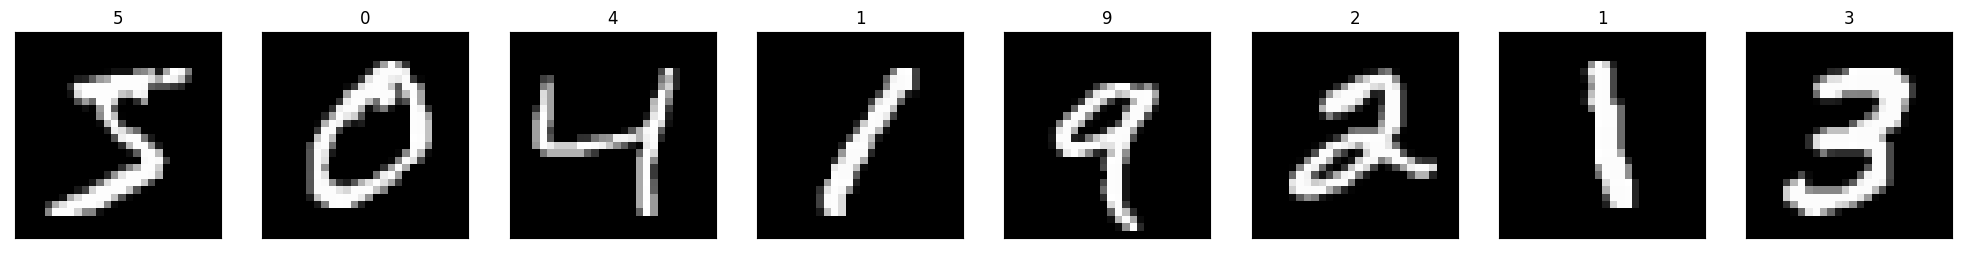

In [5]:
plt.figure(figsize=(25,4))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(y_train[i])

## Define model

In [6]:
def build_model(input_shape, num_classes):
  # Input Layer
  input = Input(input_shape)
  model = Flatten()(input)

  # Hidden Layer
  model = Dense(128, activation="relu")(model)

  # Output Layer
  output = Dense(num_classes, activation="softmax")(model)

  return Model(inputs = input, outputs = output)

## Compile and fit model for SGD optimizer

In [7]:
model_SGD = build_model(
    input_shape= (IMG_WIDTH, IMG_HEIGHT),
    num_classes= n_classes
)
# Compile model
model_SGD.compile(
    optimizer = SGD(learning_rate=0.01),
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") 
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
# Fit model
history = model_SGD.fit(
    x = x_train,
    y = y_train,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_split = 0.2,
    callbacks=[tensorboard_callback]
)

Epoch 1/5
750/750 [==============================] - 2s 2ms/step - loss: 16.9750 - accuracy: 0.3555 - val_loss: 1.5080 - val_accuracy: 0.4615
Epoch 2/5
750/750 [==============================] - 1s 1ms/step - loss: 1.5239 - accuracy: 0.4759 - val_loss: 1.3303 - val_accuracy: 0.5523
Epoch 3/5
750/750 [==============================] - 1s 2ms/step - loss: 1.3398 - accuracy: 0.5326 - val_loss: 1.5651 - val_accuracy: 0.5678
Epoch 4/5
750/750 [==============================] - 1s 2ms/step - loss: 1.4214 - accuracy: 0.4919 - val_loss: 1.2917 - val_accuracy: 0.5363
Epoch 5/5
750/750 [==============================] - 1s 2ms/step - loss: 1.2352 - accuracy: 0.5623 - val_loss: 1.1775 - val_accuracy: 0.5667


## Compile and fit model for Adam optimizer

In [8]:
model_Adam = build_model(
    input_shape= (IMG_WIDTH, IMG_HEIGHT),
    num_classes= n_classes
)
# Compile model
model_Adam.compile(
    optimizer = Adam(learning_rate=0.01),
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") +"/"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
# Fit model
history = model_Adam.fit(
    x = x_train,
    y = y_train,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_split = 0.2,
    callbacks=[tensorboard_callback]
)

Epoch 1/5
750/750 [==============================] - 2s 2ms/step - loss: 3.5014 - accuracy: 0.7477 - val_loss: 0.7195 - val_accuracy: 0.8361
Epoch 2/5
750/750 [==============================] - 2s 2ms/step - loss: 0.7179 - accuracy: 0.8166 - val_loss: 0.8555 - val_accuracy: 0.7304
Epoch 3/5
750/750 [==============================] - 2s 2ms/step - loss: 0.9132 - accuracy: 0.7546 - val_loss: 1.0434 - val_accuracy: 0.6694
Epoch 4/5
750/750 [==============================] - 1s 2ms/step - loss: 1.2547 - accuracy: 0.5901 - val_loss: 1.4569 - val_accuracy: 0.4604
Epoch 5/5
750/750 [==============================] - 1s 2ms/step - loss: 1.4844 - accuracy: 0.4779 - val_loss: 1.6009 - val_accuracy: 0.4684


## Compile and fit model for RMSProp optimizer

In [9]:
model_RMSProp = build_model(
    input_shape= (IMG_WIDTH, IMG_HEIGHT),
    num_classes= n_classes
)
# Compile model
model_RMSProp.compile(
    optimizer = RMSprop(learning_rate=0.01),
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") +"/"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
# Fit model
history = model_RMSProp.fit(
    x = x_train,
    y = y_train,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_split = 0.2,
    callbacks=[tensorboard_callback]
)

Epoch 1/5
750/750 [==============================] - 2s 2ms/step - loss: 8.1932 - accuracy: 0.6443 - val_loss: 1.2899 - val_accuracy: 0.6850
Epoch 2/5
750/750 [==============================] - 1s 2ms/step - loss: 1.4492 - accuracy: 0.7059 - val_loss: 1.2154 - val_accuracy: 0.6877
Epoch 3/5
750/750 [==============================] - 2s 2ms/step - loss: 1.4700 - accuracy: 0.7104 - val_loss: 1.5658 - val_accuracy: 0.7218
Epoch 4/5
750/750 [==============================] - 1s 2ms/step - loss: 1.5154 - accuracy: 0.7050 - val_loss: 1.3991 - val_accuracy: 0.7263
Epoch 5/5
750/750 [==============================] - 2s 2ms/step - loss: 1.4106 - accuracy: 0.7090 - val_loss: 1.7323 - val_accuracy: 0.7176


## Compile and fit model for AdaGrad optimizer

In [10]:
model_AdaGrad = build_model(
    input_shape= (IMG_WIDTH, IMG_HEIGHT),
    num_classes= n_classes
)
# Compile model
model_AdaGrad.compile(
    optimizer = Adagrad(learning_rate=0.01),
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") +"/"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
# Fit model
history = model_AdaGrad.fit(
    x = x_train,
    y = y_train,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_split = 0.2,
    callbacks=[tensorboard_callback]
)

Epoch 1/5
750/750 [==============================] - 2s 2ms/step - loss: 4.3525 - accuracy: 0.8569 - val_loss: 1.1206 - val_accuracy: 0.8879
Epoch 2/5
750/750 [==============================] - 2s 2ms/step - loss: 0.8413 - accuracy: 0.8988 - val_loss: 0.8565 - val_accuracy: 0.8988
Epoch 3/5
750/750 [==============================] - 1s 2ms/step - loss: 0.5475 - accuracy: 0.9145 - val_loss: 0.7281 - val_accuracy: 0.9048
Epoch 4/5
750/750 [==============================] - 1s 2ms/step - loss: 0.4071 - accuracy: 0.9267 - val_loss: 0.6525 - val_accuracy: 0.9079
Epoch 5/5
750/750 [==============================] - 1s 2ms/step - loss: 0.3298 - accuracy: 0.9345 - val_loss: 0.6069 - val_accuracy: 0.9148


## Load and compile best model

In [68]:
# load best model
best_model = model_AdaGrad
# compile best model
best_model.compile(
    optimizer = Adagrad(learning_rate=0.01),
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)

## Evaluate best model

In [71]:
# evaluate best model
train_evaluate = best_model.evaluate(x_train, y_train, batch_size=BATCH_SIZE)
test_evaluate = best_model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print("Train evaluation is: ", train_evaluate)
print("Test evaluation is: ", test_evaluate)

157/157 [==============================] - 0s 772us/step - loss: 2.3034 - accuracy: 0.1136
Train evaluation is:  [2.301168441772461, 0.11236666887998581]
Test evaluation is:  [2.3033528327941895, 0.1136000007390976]


## Get Reports

In [63]:
# get report of metrics
from sklearn.metrics import classification_report, confusion_matrix
